In [1]:
from Players import RandomPlayer, RLPlayer, NNPlayer, ProbabilityPlayer
from OthelloGame import Othello
from Simulation import Simulation

Using TensorFlow backend.


# Random vs random simulations
At first I want to get an idea of what win percentage to expect for the starting player when playing randomly against a random opponent. Here I simulated 10000 games for each of the board sizes 4, 6 and 8. Displayed with 95% confidence intervals. 

## 4x4

In [40]:
game_1 = Othello(4)
rp_4x4_1 = RandomPlayer(game_1)
rp_4x4_2 = RandomPlayer(game_1)
sim_4x4_randomvsrandom = Simulation(rp_4x4_1, rp_4x4_2, n = 10000)
sim_4x4_randomvsrandom.simulate()

P1 (starting player) won  34.839999999999996 % of the time.
95 % confidence interval:  (0.3390614875524021, 0.35773851244759786)
0.008607639193534852  s per round


(0.3484, 0.3390614875524021, 0.35773851244759786)

## 6x6

In [41]:
game_2 = Othello(6)
rp_6x6_1 = RandomPlayer(game_2)
rp_6x6_2 = RandomPlayer(game_2)
sim_6x6_randomvsrandom = Simulation(rp_6x6_1, rp_6x6_2, n = 10000)
sim_6x6_randomvsrandom.simulate()

P1 (starting player) won  43.43 % of the time.
95 % confidence interval:  (0.42458515009591713, 0.4440148499040829)
0.05292244460582733  s per round


(0.4343, 0.42458515009591713, 0.4440148499040829)

## 8x8

In [42]:
game_3 = Othello(8)
rp_8x8_1 = RandomPlayer(game_3)
rp_8x8_2 = RandomPlayer(game_3)
sim_8x8_randomvsrandom = Simulation(rp_8x8_1, rp_8x8_2, n = 10000)
sim_8x8_randomvsrandom.simulate()

P1 (starting player) won  45.839999999999996 % of the time.
95 % confidence interval:  (0.4486341573318182, 0.46816584266818173)
0.17811383149623872  s per round


(0.4584, 0.4486341573318182, 0.46816584266818173)

# Reinforcement learner
Training the reinforcement learner agent (implemented in RLPlayer) for 10000 rounds. The agent is tested (by playing 100 games against random) every 500 rounds and win percentage is displayed, along with 95% confidence intervals. Test performance as a function of training iterations is plotted in the end, with 95% confidence intervals. 

## 4x4 
Tha agent learns quickly and reaches > 90% wins against random after less than 2000 training rounds. After that the performance stagnates, which is possibly becuase it is possible for the non-starting player to play perfectly i.e. win no matter the opponents performance. 

P1 (starting player) won  52.0 % of the time.
95 % confidence interval:  (0.4220802307169153, 0.6179197692830847)
0.014545369148254394  s per round
P1 (starting player) won  72.0 % of the time.
95 % confidence interval:  (0.6319978353532179, 0.8080021646467821)
0.0162605619430542  s per round
P1 (starting player) won  84.0 % of the time.
95 % confidence interval:  (0.7681465334516635, 0.9118534665483364)
0.01620915174484253  s per round
P1 (starting player) won  94.0 % of the time.
95 % confidence interval:  (0.8934534343385949, 0.986546565661405)
0.01673261880874634  s per round
P1 (starting player) won  95.0 % of the time.
95 % confidence interval:  (0.9072835752920528, 0.9927164247079471)
0.01511699914932251  s per round
P1 (starting player) won  99.0 % of the time.
95 % confidence interval:  (0.9704986045820121, 1.0)
0.016432812213897707  s per round
P1 (starting player) won  91.0 % of the time.
95 % confidence interval:  (0.8539094056534566, 0.9660905943465434)
0.01618816137313843

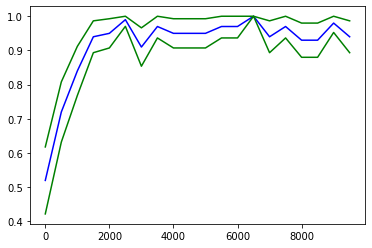

0.019778793692588805  s per training round


In [6]:
game_4 = Othello(4)
rlp_4x4_1 = RLPlayer(game_4)
rp_4x4_3 = RandomPlayer(game_4)
sim_4x4_rlvsrandom = Simulation(rlp_4x4_1, rp_4x4_3, n = 10000)
sim_4x4_rlvsrandom.train(test_freq = 500)
rlp_4x4_1.save_action_value_map('rlp_4x4_1_map')

## 6x6 
The agent quickly becomes better than random, but stagnates around 70% wins.

P1 (starting player) won  37.0 % of the time.
95 % confidence interval:  (0.27537209443806754, 0.46462790556193245)
0.1070120882987976  s per round
P1 (starting player) won  67.0 % of the time.
95 % confidence interval:  (0.5778400007999419, 0.7621599992000582)
0.11245330095291138  s per round
P1 (starting player) won  64.0 % of the time.
95 % confidence interval:  (0.5459217287420775, 0.7340782712579226)
0.10204740047454834  s per round
P1 (starting player) won  68.0 % of the time.
95 % confidence interval:  (0.588572354324141, 0.7714276456758591)
0.10704968929290772  s per round
P1 (starting player) won  64.0 % of the time.
95 % confidence interval:  (0.5459217287420775, 0.7340782712579226)
0.11217587947845459  s per round
P1 (starting player) won  69.0 % of the time.
95 % confidence interval:  (0.5993529900246857, 0.7806470099753142)
0.10252333164215088  s per round
P1 (starting player) won  75.0 % of the time.
95 % confidence interval:  (0.6651310699442872, 0.8348689300557128)
0.10

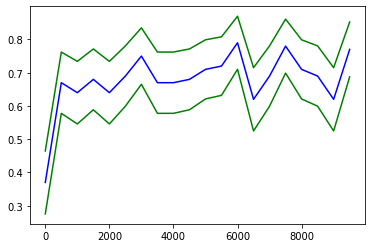

0.12333225779533387  s per training round


In [7]:
game_5 = Othello(6)
rlp_6x6_1 = RLPlayer(game_5)
rp_6x6_3 = RandomPlayer(game_5)
sim_6x6_rlvsrandom = Simulation(rlp_6x6_1, rp_6x6_3, n = 10001)
sim_6x6_rlvsrandom.train(test_freq = 500)
rlp_6x6_1.save_action_value_map('rlp_6x6_1_map')

## 8x8 
Compared to the random case of around 45% wins for the starting player, the agent performs better. However, no significant improvement can be seen over time. A likely reason is that the amount of possible boards is so vast that the agent will almost certainly encounter never seen boards almost all of the time, and the previous experience of the agent will not help in such case. If infinite training time was possible, the agent would probably learn to play perfectly.

P1 (starting player) won  52.0 % of the time.
95 % confidence interval:  (0.4220802307169153, 0.6179197692830847)
0.34679665088653566  s per round
P1 (starting player) won  61.0 % of the time.
95 % confidence interval:  (0.5144027692114916, 0.7055972307885083)
0.38758354902267456  s per round
P1 (starting player) won  56.00000000000001 % of the time.
95 % confidence interval:  (0.4627099463758483, 0.6572900536241518)
0.35451716899871827  s per round
P1 (starting player) won  55.00000000000001 % of the time.
95 % confidence interval:  (0.45249302291006066, 0.6475069770899394)
0.3614871311187744  s per round
P1 (starting player) won  68.0 % of the time.
95 % confidence interval:  (0.588572354324141, 0.7714276456758591)
0.3573949503898621  s per round
P1 (starting player) won  56.99999999999999 % of the time.
95 % confidence interval:  (0.47296693568931614, 0.6670330643106838)
0.37447539806365965  s per round
P1 (starting player) won  65.0 % of the time.
95 % confidence interval:  (0.5565

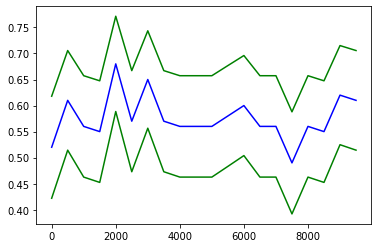

0.44075917770862577  s per training round


In [8]:
game_6 = Othello(8)
rlp_8x8_1 = RLPlayer(game_6)
rlp_8x8_3 = RandomPlayer(game_6)
sim_8x8_rlvsrandom = Simulation(rlp_8x8_1, rlp_8x8_3, n = 10001)
sim_8x8_rlvsrandom.train(test_freq = 500)
rlp_8x8_1.save_action_value_map('rlp_8x8_1_map')

## Higher learning rates
To see if it was impossible to make the agent learn faster, I tried raising the learning rate. It seems raising the learning rate did not improve the performance, although the broad confidence intervals make it impossible to say for sure.  

P1 (starting player) won  53.0 % of the time.
95 % confidence interval:  (0.432178356575096, 0.627821643424904)
0.3433670878410339  s per round
P1 (starting player) won  55.00000000000001 % of the time.
95 % confidence interval:  (0.45249302291006066, 0.6475069770899394)
0.3542146182060242  s per round
P1 (starting player) won  53.0 % of the time.
95 % confidence interval:  (0.432178356575096, 0.627821643424904)
0.3590118598937988  s per round
P1 (starting player) won  53.0 % of the time.
95 % confidence interval:  (0.432178356575096, 0.627821643424904)
0.35394677877426145  s per round
P1 (starting player) won  63.0 % of the time.
95 % confidence interval:  (0.5353720944380675, 0.7246279055619325)
0.3657139015197754  s per round
P1 (starting player) won  56.00000000000001 % of the time.
95 % confidence interval:  (0.4627099463758483, 0.6572900536241518)
0.3625039505958557  s per round
P1 (starting player) won  62.0 % of the time.
95 % confidence interval:  (0.5248660051214322, 0.715133

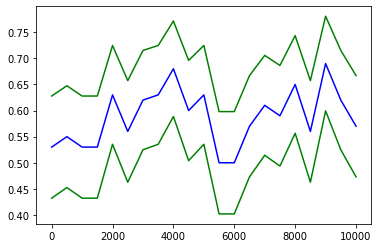

0.44436487902666183  s per training round


In [13]:
game_11 = Othello(8)
rlp_8x8_2 = RLPlayer(game_11, lr = 0.3)
rp_8x8_3 = RandomPlayer(game_11)
sim_8x8_rlvsrandom = Simulation(rlp_8x8_2, rp_8x8_3, n = 10001)
sim_8x8_rlvsrandom.train(test_freq = 500)
rlp_8x8_2.save_action_value_map('rlp_8x8_2_map')

P1 (starting player) won  56.00000000000001 % of the time.
95 % confidence interval:  (0.4627099463758483, 0.6572900536241518)
0.3967156386375427  s per round
P1 (starting player) won  54.0 % of the time.
95 % confidence interval:  (0.4423158983733576, 0.6376841016266425)
0.37443821907043456  s per round
P1 (starting player) won  47.0 % of the time.
95 % confidence interval:  (0.37217835657509596, 0.5678216434249039)
0.37494984865188596  s per round
P1 (starting player) won  55.00000000000001 % of the time.
95 % confidence interval:  (0.45249302291006066, 0.6475069770899394)
0.3874069690704346  s per round
P1 (starting player) won  57.99999999999999 % of the time.
95 % confidence interval:  (0.4832643101683205, 0.6767356898316794)
0.3847675800323486  s per round
P1 (starting player) won  64.0 % of the time.
95 % confidence interval:  (0.5459217287420775, 0.7340782712579226)
0.3986039590835571  s per round
P1 (starting player) won  53.0 % of the time.
95 % confidence interval:  (0.43217

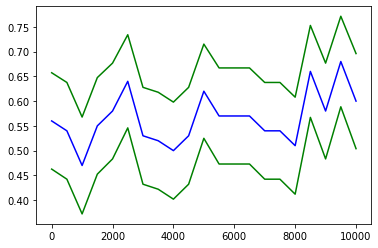

0.4649091029617741  s per training round


In [14]:
game_12 = Othello(8)
rlp_8x8_3 = RLPlayer(game_11, lr = 0.8)
rp_8x8_6 = RandomPlayer(game_11)
sim_8x8_rlvsrandom = Simulation(rlp_8x8_3, rp_8x8_6, n = 10001)
sim_8x8_rlvsrandom.train(test_freq = 500)
rlp_8x8_3.save_action_value_map('rlp_8x8_3_map')

# Neural network agents
Training the neural network learner agent (implemented in NNPlayer) for 10001 rounds. Like previously, the agent is tested (by playing 100 games against random) every 500 rounds and win percentage is displayed, along with 95% confidence intervals. Test performance as a function of training iterations is plotted in the end, with 95% confidence intervals. 

## 4x4 
The agent is doubtlessly improving over time, but significantly slower than the RLPlayer.

P1 (starting player) won  56.99999999999999 % of the time.
95 % confidence interval:  (0.47296693568931614, 0.6670330643106838)
0.017739880084991454  s per round
P1 (starting player) won  78.0 % of the time.
95 % confidence interval:  (0.6988092164324601, 0.86119078356754)
0.01580122709274292  s per round
P1 (starting player) won  83.0 % of the time.
95 % confidence interval:  (0.7563773241725118, 0.9036226758274881)
0.015522041320800782  s per round
P1 (starting player) won  72.0 % of the time.
95 % confidence interval:  (0.6319978353532179, 0.8080021646467821)
0.015375659465789795  s per round
P1 (starting player) won  70.0 % of the time.
95 % confidence interval:  (0.6101831668145794, 0.7898168331854205)
0.015014808177947998  s per round
P1 (starting player) won  66.0 % of the time.
95 % confidence interval:  (0.5671547869104842, 0.7528452130895159)
0.015157299041748047  s per round
P1 (starting player) won  69.0 % of the time.
95 % confidence interval:  (0.5993529900246857, 0.78064

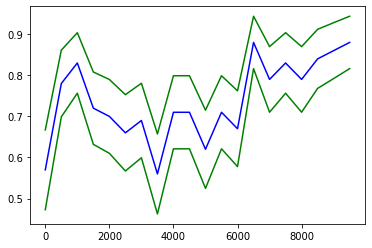

0.021722417187690735  s per training round


In [9]:
game_7 = Othello(4)
nnp_4x4_1 = NNPlayer(game_7, epsilon = 0.1)
rp_4x4_4 = RandomPlayer(game_7)
sim_4x4_nnvsrandom = Simulation(nnp_4x4_1, rp_4x4_4, n = 10001)
sim_4x4_nnvsrandom.train(test_freq = 500)
nnp_4x4_1.save_network('nnp_4x4_1_net')

After training for 10001 more rounds, the agent does not seem to be improving much, and still seems to perform worse than RLPlayer

P1 (starting player) won  89.0 % of the time.
95 % confidence interval:  (0.8286747345259758, 0.9513252654740242)
0.01584520101547241  s per round
P1 (starting player) won  90.0 % of the time.
95 % confidence interval:  (0.8412010804637984, 0.9587989195362017)
0.01826000928878784  s per round
P1 (starting player) won  82.0 % of the time.
95 % confidence interval:  (0.7447006426365766, 0.8952993573634233)
0.015499970912933349  s per round
P1 (starting player) won  88.0 % of the time.
95 % confidence interval:  (0.8163087092715731, 0.943691290728427)
0.015983541011810303  s per round
P1 (starting player) won  92.0 % of the time.
95 % confidence interval:  (0.8668275100072333, 0.9731724899927667)
0.015535130500793456  s per round
P1 (starting player) won  86.0 % of the time.
95 % confidence interval:  (0.7919917915239952, 0.9280082084760047)
0.01666348218917847  s per round
P1 (starting player) won  85.0 % of the time.
95 % confidence interval:  (0.7800152874094277, 0.9199847125905722)
0.

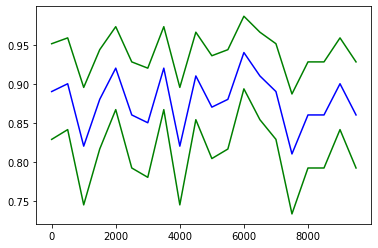

0.023404498100280762  s per training round


In [16]:
sim_4x4_nnvsrandom.train(test_freq = 500)


## 6x6 
The agent learns faster than the RLPlayer, and performs way better. This goes to show that the network is able to learn patterns in the boards, and can use these for evaluating the value of never taken actions, meaning that the model works. 

P1 (starting player) won  49.0 % of the time.
95 % confidence interval:  (0.39202140237319877, 0.5879785976268013)
0.07758557081222534  s per round
P1 (starting player) won  50.0 % of the time.
95 % confidence interval:  (0.4020018007729973, 0.5979981992270027)
0.07675748109817505  s per round
P1 (starting player) won  72.0 % of the time.
95 % confidence interval:  (0.6319978353532179, 0.8080021646467821)
0.07746025800704956  s per round
P1 (starting player) won  74.0 % of the time.
95 % confidence interval:  (0.6540292679395162, 0.8259707320604838)
0.07598541021347045  s per round
P1 (starting player) won  88.0 % of the time.
95 % confidence interval:  (0.8163087092715731, 0.943691290728427)
0.08001453161239624  s per round
P1 (starting player) won  87.0 % of the time.
95 % confidence interval:  (0.8040857380667503, 0.9359142619332497)
0.0784485387802124  s per round
P1 (starting player) won  85.0 % of the time.
95 % confidence interval:  (0.7800152874094277, 0.9199847125905722)
0.081

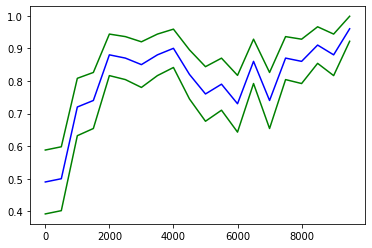

0.10003294970989228  s per training round


In [10]:
game_8 = Othello(6)
nnp_6x6_1 = NNPlayer(game_8, epsilon = 0.1)
rp_6x6_4 = RandomPlayer(game_8)
sim_6x6_nnvsrandom = Simulation(nnp_6x6_1, rp_6x6_4, n = 10001)
sim_6x6_nnvsrandom.train(test_freq = 500)
nnp_6x6_1.save_network('nnp_6x6_1_net')

## 8x8 
The agent performs significantly better than RLPlayer, but still is not very impressive as it beats the random player less than 80 % of the time

P1 (starting player) won  55.00000000000001 % of the time.
95 % confidence interval:  (0.45249302291006066, 0.6475069770899394)
0.2532858204841614  s per round
P1 (starting player) won  70.0 % of the time.
95 % confidence interval:  (0.6101831668145794, 0.7898168331854205)
0.23211637020111084  s per round
P1 (starting player) won  67.0 % of the time.
95 % confidence interval:  (0.5778400007999419, 0.7621599992000582)
0.2591417407989502  s per round
P1 (starting player) won  71.0 % of the time.
95 % confidence interval:  (0.6210642720173202, 0.7989357279826798)
0.26413036823272706  s per round
P1 (starting player) won  73.0 % of the time.
95 % confidence interval:  (0.6429855452491477, 0.8170144547508522)
0.2575775933265686  s per round
P1 (starting player) won  82.0 % of the time.
95 % confidence interval:  (0.7447006426365766, 0.8952993573634233)
0.2536971378326416  s per round
P1 (starting player) won  83.0 % of the time.
95 % confidence interval:  (0.7563773241725118, 0.903622675827

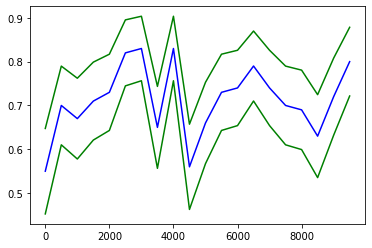

0.3024989777088165  s per training round


In [11]:
game_9 = Othello(8)
nnp_8x8_1 = NNPlayer(game_9, epsilon = 0.1)
rp_8x8_4 = RandomPlayer(game_9)
sim_8x8_nnvsrandom = Simulation(nnp_8x8_1, rp_8x8_4, n = 10001)
sim_8x8_nnvsrandom.train(test_freq = 500)
nnp_8x8_1.save_network('nnp_8x8_1_net')

## Lowering epsilon 
To try to improve the models performance on the 8x8 board I tried lowering the models willingness to explore by a factor 10. My hypothesis was that the fact that the model chooses random moves 10% of the time makes the outcome of the game too close to random, and the model cannot learn useful patterns as a good move might be followed by a later random move making the agent lose, and thus punishing both the good and the bad move. 

The learning seems to be improving by lowering epsilon, and is also less noisy. 

P1 (starting player) won  63.0 % of the time.
95 % confidence interval:  (0.5353720944380675, 0.7246279055619325)
0.24449074029922485  s per round
P1 (starting player) won  63.0 % of the time.
95 % confidence interval:  (0.5353720944380675, 0.7246279055619325)
0.2469437289237976  s per round
P1 (starting player) won  72.0 % of the time.
95 % confidence interval:  (0.6319978353532179, 0.8080021646467821)
0.2393197226524353  s per round
P1 (starting player) won  61.0 % of the time.
95 % confidence interval:  (0.5144027692114916, 0.7055972307885083)
0.23536964893341064  s per round
P1 (starting player) won  67.0 % of the time.
95 % confidence interval:  (0.5778400007999419, 0.7621599992000582)
0.22979689836502076  s per round
P1 (starting player) won  67.0 % of the time.
95 % confidence interval:  (0.5778400007999419, 0.7621599992000582)
0.23024590253829957  s per round
P1 (starting player) won  70.0 % of the time.
95 % confidence interval:  (0.6101831668145794, 0.7898168331854205)
0.2335

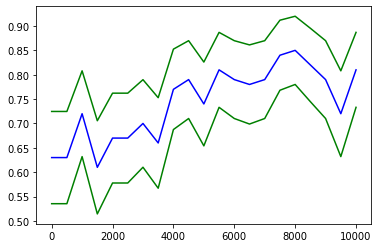

0.30084079642878  s per training round


In [12]:
game_10 = Othello(8)
nnp_8x8_2 = NNPlayer(game_9, epsilon = 0.01)
rp_8x8_5 = RandomPlayer(game_9)
sim_8x8_nnvsrandom_2 = Simulation(nnp_8x8_2, rp_8x8_5, n = 10001)
sim_8x8_nnvsrandom_2.train(test_freq = 500)
nnp_8x8_2.save_network('nnp_8x8_2_net')

Doing another 10001 training round significantly improves the agent, resulting in win percentages around the high eighties.

P1 (starting player) won  79.0 % of the time.
95 % confidence interval:  (0.710169052470038, 0.869830947529962)
0.43609511852264404  s per round
P1 (starting player) won  79.0 % of the time.
95 % confidence interval:  (0.710169052470038, 0.869830947529962)
0.28454421043395994  s per round
P1 (starting player) won  72.0 % of the time.
95 % confidence interval:  (0.6319978353532179, 0.8080021646467821)
0.2510721802711487  s per round
P1 (starting player) won  74.0 % of the time.
95 % confidence interval:  (0.6540292679395162, 0.8259707320604838)
0.2741562533378601  s per round
P1 (starting player) won  73.0 % of the time.
95 % confidence interval:  (0.6429855452491477, 0.8170144547508522)
0.23247248888015748  s per round
P1 (starting player) won  79.0 % of the time.
95 % confidence interval:  (0.710169052470038, 0.869830947529962)
0.2389427399635315  s per round
P1 (starting player) won  82.0 % of the time.
95 % confidence interval:  (0.7447006426365766, 0.8952993573634233)
0.23729685068

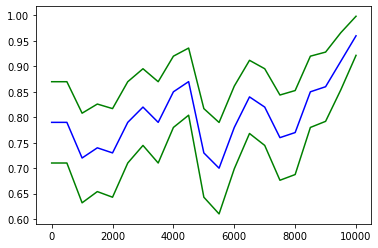

0.31345025130169785  s per training round


In [15]:
sim_8x8_nnvsrandom_2.train(test_freq = 500)


Testing the agent with a higher number of simulations makes me more sure that it wins against random more than 80% of the time. A significant improvement from the RLPlayer which never managed to get over 70%, and way better than the random starting player which wins only around 45% of the time.   

In [19]:
nnp_8x8_2.save_network('nnp_8x8_2_net')
sim_8x8_nnvsrandom_2.simulate(n = 1000)

P1 (starting player) won  86.5 % of the time.
95 % confidence interval:  (0.8438201427345093, 0.8861798572654906)
0.25349629211425784  s per round


(0.865, 0.8438201427345093, 0.8861798572654906)

## Performance vs actual computer othello player 
As the goal is to train an Othello player that can beat real opponents - not just opponents playing randomly - i tested the best agent against a computer Othello player found at https://playpager.com/othello-reversi/. Playing againts the middle of three difficulties the Neural Network agent managed to win, despite some moves that felt unintuitive to me. See the game below, where the neural network player is the starting player (ones). As I only tested it once there is no statistical proof that it works, but I still think it is somewhat of an accomplishment. 

Another interesting thing is that the model tries to get the "corner spots", which is intuitively a smart thing to to playing Othello. Furthermore, it seems to favorize getting the main diagonals of the board. 

In [39]:
nnp_8x8_2.test_mode()
nnp_8x8_2.playvshuman()

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
Row index 4
Column index2
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0. -1. -1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
Press somewhere
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0. -1.  1. -1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
Row index 2
Column index4
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -

Press somewhere
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  0.  0.]
 [ 1. -1.  1. -1.  1.  1.  0.  0.]
 [ 1. -1.  1.  1. -1.  1.  0.  0.]
 [ 1. -1.  1.  1.  1.  1.  0.  0.]
 [ 1.  0.  1. -1.  1.  1. -1.  0.]
 [ 1.  0. -1.  0.  0.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.]]
Row index 7
Column index4
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  0.  0.]
 [ 1. -1.  1. -1.  1.  1.  0.  0.]
 [ 1. -1.  1.  1. -1.  1.  0.  0.]
 [ 1. -1.  1.  1.  1.  1.  0.  0.]
 [ 1.  0.  1. -1.  1.  1. -1.  0.]
 [ 1.  0. -1.  0.  0. -1.  0.  0.]
 [ 1.  1.  1.  0. -1.  0.  0.  0.]]
Press somewhere
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  0.  0.]
 [ 1. -1.  1. -1.  1.  1.  0.  0.]
 [ 1. -1.  1.  1. -1.  1.  0.  0.]
 [ 1. -1.  1.  1.  1.  1.  0.  0.]
 [ 1.  0.  1. -1.  1.  1. -1.  0.]
 [ 1.  0. -1.  0.  0.  1.  0.  0.]
 [ 1.  1.  1.  0. -1.  0.  1.  0.]]
Row index 4
Column index6
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  0.  0.]
 [ 

Press somewhere
[[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1. -1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1. -1. -1. -1. -1.]
 [ 1. -1.  1.  1.  1. -1.  1. -1.]
 [ 1.  1.  1.  1. -1.  1.  1. -1.]
 [ 1.  0.  1.  1.  1.  1.  1. -1.]
 [ 1.  1.  1.  1.  0. -1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1. -1.]]
Row index 6
Column index4
[[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1. -1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1. -1. -1. -1. -1.]
 [ 1. -1.  1.  1.  1. -1.  1. -1.]
 [ 1.  1. -1.  1. -1.  1. -1. -1.]
 [ 1.  0.  1. -1. -1. -1.  1. -1.]
 [ 1.  1.  1.  1. -1. -1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1. -1.]]
Press somewhere
[[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1. -1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1. -1. -1. -1. -1.]
 [ 1. -1.  1.  1.  1. -1.  1. -1.]
 [ 1.  1.  1.  1. -1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1. -1.  1. -1.]
 [ 1.  1.  1.  1. -1. -1.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1. -1.]]
Row index 1
Column index1
[[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.  1.  1. -1.]
 [ 